In [1]:
!mkdir /habitat-api/data
!ln -s /home/data/ /habitat-api/data/

In [2]:
import os
os.chdir('/home/MY_FOLDER')
!mkdir /home/MY_FOLDER/configs
!ln -s /home/configs/ /home/MY_FOLDER/configs/
os.getcwd()

mkdir: cannot create directory '/home/MY_FOLDER/configs': File exists
ln: failed to create symbolic link '/home/MY_FOLDER/configs/configs': File exists


'/home/MY_FOLDER'

In [3]:
import sys
sys.path.append('/home')

# PPO BASELINE

In [5]:
from habitat_baselines.common.baseline_registry import baseline_registry
from habitat_baselines.config.default import get_config
import habitat
import argparse
import random
import numpy as np

In [6]:
from habitat import Config, Env, RLEnv, VectorEnv, make_dataset
from habitat_baselines.common.env_utils import make_env_fn
from habitat_baselines.common.baseline_registry import baseline_registry
from habitat_baselines.common.environments import get_env_class

In [7]:
parser = argparse.ArgumentParser()
parser.add_argument(
    "--run-type",
    choices=["train", "eval"],
    required=True,
    help="run type of the experiment (train or eval)",
)
parser.add_argument(
    "--exp-config",
    type=str,
    required=True,
    help="path to config yaml containing info about experiment",
)
parser.add_argument(
    "opts",
    default=None,
    nargs=argparse.REMAINDER,
    help="Modify config options from command line",
)

args = parser.parse_args("--exp-config /habitat-api/habitat_baselines/config/pointnav/ppo_pointnav.yaml --run-type train".split())

In [8]:
config = get_config(args.exp_config, args.opts)

In [9]:
trainer_init = baseline_registry.get_trainer(config.TRAINER_NAME)

In [10]:
trainer = trainer_init(config)

2019-12-05 14:21:30,239 config: BASE_TASK_CONFIG_PATH: configs/tasks/pointnav.yaml
CHECKPOINT_FOLDER: data/new_checkpoints
CHECKPOINT_INTERVAL: 50
CMD_TRAILING_OPTS: []
ENV_NAME: NavRLEnv
EVAL:
  SPLIT: val
  USE_CKPT_CONFIG: True
EVAL_CKPT_PATH_DIR: data/new_checkpoints
LOG_FILE: train.log
LOG_INTERVAL: 10
NUM_PROCESSES: 1
NUM_UPDATES: 10000
ORBSLAM2:
  ANGLE_TH: 0.2617993877991494
  BETA: 100
  CAMERA_HEIGHT: 1.25
  DEPTH_DENORM: 10
  DIST_REACHED_TH: 0.15
  DIST_TO_STOP: 0.05
  D_OBSTACLE_MAX: 4.0
  D_OBSTACLE_MIN: 0.1
  H_OBSTACLE_MAX: 1.25
  H_OBSTACLE_MIN: 0.375
  MAP_CELL_SIZE: 0.1
  MAP_SIZE: 40
  MIN_PTS_IN_OBSTACLE: 320.0
  NEXT_WAYPOINT_TH: 0.5
  NUM_ACTIONS: 3
  PLANNER_MAX_STEPS: 500
  PREPROCESS_MAP: True
  SLAM_SETTINGS_PATH: habitat_baselines/slambased/data/mp3d3_small1k.yaml
  SLAM_VOCAB_PATH: habitat_baselines/slambased/data/ORBvoc.txt
RL:
  PPO:
    clip_param: 0.1
    entropy_coef: 0.01
    eps: 1e-05
    gamma: 0.99
    hidden_size: 512
    lr: 0.00025
    max_grad

In [11]:
trainer.train()

2019-12-05 14:21:33,321 Initializing dataset PointNav-v1
2019-12-05 14:21:38,168 agent number of parameters: 14486661
/opt/conda/envs/habitat/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
2019-12-05 14:21:49,629 update: 10	fps: 123.403	
2019-12-05 14:21:49,630 update: 10	env-time: 6.002s	pth-time: 4.999s	frames: 1408
2019-12-05 14:21:49,631 Average window size 11 reward: -0.034915
2019-12-05 14:21:59,549 update: 20	fps: 126.017	
2019-12-05 14:21:59,550 update: 20	env-time: 11.470s	pth-time: 9.425s	fram

KeyboardInterrupt: 

In [12]:
trainer.eval()

2019-12-05 14:22:38,554 =======current_ckpt: data/new_checkpoints/ckpt.0.pth=======
2019-12-05 14:22:38,608 env config: BASE_TASK_CONFIG_PATH: configs/tasks/pointnav.yaml
CHECKPOINT_FOLDER: data/new_checkpoints
CHECKPOINT_INTERVAL: 50
CMD_TRAILING_OPTS: []
ENV_NAME: NavRLEnv
EVAL:
  SPLIT: val
  USE_CKPT_CONFIG: True
EVAL_CKPT_PATH_DIR: data/new_checkpoints
LOG_FILE: train.log
LOG_INTERVAL: 10
NUM_PROCESSES: 1
NUM_UPDATES: 10000
ORBSLAM2:
  ANGLE_TH: 0.2617993877991494
  BETA: 100
  CAMERA_HEIGHT: 1.25
  DEPTH_DENORM: 10
  DIST_REACHED_TH: 0.15
  DIST_TO_STOP: 0.05
  D_OBSTACLE_MAX: 4.0
  D_OBSTACLE_MIN: 0.1
  H_OBSTACLE_MAX: 1.25
  H_OBSTACLE_MIN: 0.375
  MAP_CELL_SIZE: 0.1
  MAP_SIZE: 40
  MIN_PTS_IN_OBSTACLE: 320.0
  NEXT_WAYPOINT_TH: 0.5
  NUM_ACTIONS: 3
  PLANNER_MAX_STEPS: 500
  PREPROCESS_MAP: True
  SLAM_SETTINGS_PATH: habitat_baselines/slambased/data/mp3d3_small1k.yaml
  SLAM_VOCAB_PATH: habitat_baselines/slambased/data/ORBvoc.txt
RL:
  PPO:
    clip_param: 0.1
    entropy_coe

KeyboardInterrupt: 

# ATTEMPT TO GET A MAP

In [13]:
cnfg = '/home/configs/pointnav_gibson.yaml'

In [14]:
env = habitat.Env(
    config=habitat.get_config(cnfg)
)

2019-12-05 14:24:08,751 Initializing dataset PointNav-v1
2019-12-05 14:25:40,381 initializing sim Sim-v0
2019-12-05 14:25:43,341 Initializing task Nav-v0


In [15]:
observations = env.reset()
observations['pointgoal'] = observations['pointgoal_with_gps_compass']

In [16]:
sys.path.append('/home/map_plan_baseline/map_and_plan_agent')
import slam
import cv2
import matplotlib.pyplot as plt
from habitat.sims.habitat_simulator.actions import HabitatSimActions

def transform_rgb_bgr(image):
    return image[:, :, [2, 1, 0]]

agent = slam.DepthMapperAndPlanner(map_size_cm=1200, out_dir=None, mark_locs=True,
                                reset_if_drift=True, count=-1, close_small_openings=True,
                                recover_on_collision=True, fix_thrashing=True, goal_f=1.1, point_cnt=2) #, using_local_policy = True)

0.0 125.0 150.0 20


In [17]:
agent.reset()
agent._reset(goal_dist=1)
agent.soft_reset(observations['pointgoal_with_gps_compass'])

Destination, distance: 7.524782, theta(radians): 1.07


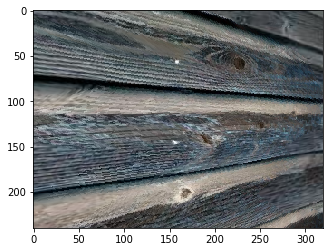

In [18]:
print("Destination, distance: {:3f}, theta(radians): {:.2f}".format(
        observations['pointgoal_with_gps_compass'][0], observations['pointgoal_with_gps_compass'][1]))
plt.imshow(transform_rgb_bgr(observations["rgb"]))

In [19]:
dct = {0:HabitatSimActions.MOVE_FORWARD,1:HabitatSimActions.TURN_LEFT,2:HabitatSimActions.TURN_RIGHT,3:HabitatSimActions.STOP}

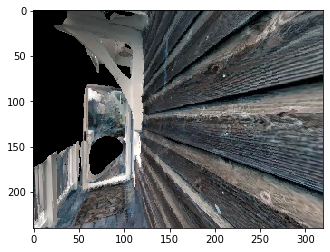

In [24]:
for i in range(3):
    action = dct[1]
    observations = env.step(action)
    observations['pointgoal'] = observations['pointgoal_with_gps_compass']
    keystroke = agent.act(observations)
plt.imshow(transform_rgb_bgr(observations["rgb"]))    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


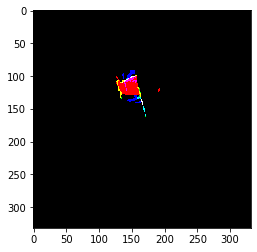

In [25]:
plt.imshow(np.transpose(np.array([agent.map[::-1,::-1,i].T for i in range(3)]),(1, 2, 0)))